In [70]:
%matplotlib inline
from collections import Counter
import screed
from itertools import izip
import gzip
import pandas as pd
from scipy.stats import linregress
from gscripts.general import dataviz
import os
img_dir = "."
import seaborn as sns

from collections import defaultdict

In [71]:
def counts_to_rpkm(featureCountsTable):
    counts = featureCountsTable.ix[:,5:]
    lengths = featureCountsTable['Length']
    mapped_reads = counts.sum()
    return (counts * pow(10,9)).div(mapped_reads, axis=1).div(lengths, axis=0)

In [72]:
counts = pd.read_table("/nas3/gpratt/Dropbox/TAF15/Data/MN_data/MN_CLIP_counts.txt", skiprows=1, index_col=0)

In [73]:
sns.color_palette

<function seaborn.palettes.color_palette>

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [145]:
illumina_colors = dict(zip(range(1,25), sns.cubehelix_palette(24, light=.9, dark=.1, reverse=True, start=1, rot=-2)))
inline_colors = dict(zip(["A01", "A04", "B06", "C01", "D08fixed", "unassigned"], sns.color_palette("Set1", 6)))
expected_colors = dict(zip(["expected", "unexpected"], sns.color_palette("Set1", 2)))
rbp_colors = dict(zip(["taf", 'fus', 'tdp'], sns.color_palette("Set1", 3)))

In [97]:
rpkm = counts_to_rpkm(counts)
rpkm = rpkm.T

new_index = []

for item in rpkm.index:
    illumina_id, inline_barcode = item.split(".")[:2]
    illumina_id = "_".join(illumina_id.split("_")[:-2])
    inline_barcode = inline_barcode.split("_")
    colors_2.append(index_colors[inline_barcode[0]])
    colors_1.append(original_colors[int(illumina_id.split("_")[1]) - 1]) 
    
    barcode_modified = inline_barcode[0]
    if len(inline_barcode) > 1:
        expectation = "expected"
    else:
        expectation = "unexpected"
    new_index.append([illumina_id, barcode_modified, expectation])
    

rpkm.index = pd.MultiIndex.from_tuples(new_index)
rpkm = rpkm.T[~(rpkm.sum() == 0).values]

In [116]:
result = defaultdict(dict)
for item_1 in rpkm.columns:
    for item_2 in rpkm.columns:
        result[item_1][item_2] = linregress(rpkm[item_1], rpkm[item_2])[2]

result = pd.DataFrame(result)

In [121]:
filtered_result = result.ix[[item != "unassigned" for item in result.index.get_level_values(level=1)]].T
filtered_result = filtered_result.ix[[item != "unassigned" for item in filtered_result.columns.get_level_values(level=1)]]

0      (0.89411765337, 0.101960785687, 0.109803922474)
1      (0.89411765337, 0.101960785687, 0.109803922474)
2      (0.89411765337, 0.101960785687, 0.109803922474)
3      (0.89411765337, 0.101960785687, 0.109803922474)
4      (0.89411765337, 0.101960785687, 0.109803922474)
5      (0.89411765337, 0.101960785687, 0.109803922474)
6      (0.89411765337, 0.101960785687, 0.109803922474)
7      (0.89411765337, 0.101960785687, 0.109803922474)
8      (0.89411765337, 0.101960785687, 0.109803922474)
9      (0.89411765337, 0.101960785687, 0.109803922474)
10     (0.89411765337, 0.101960785687, 0.109803922474)
11     (0.89411765337, 0.101960785687, 0.109803922474)
12     (0.89411765337, 0.101960785687, 0.109803922474)
13     (0.89411765337, 0.101960785687, 0.109803922474)
14     (0.89411765337, 0.101960785687, 0.109803922474)
15     (0.89411765337, 0.101960785687, 0.109803922474)
16     (0.89411765337, 0.101960785687, 0.109803922474)
17     (0.89411765337, 0.101960785687, 0.109803922474)
18    (0.3

In [147]:
illumina_color_results = pd.Series(filtered_result.index.get_level_values(level=0)).apply(lambda x: illumina_colors[int(x.split("_")[1])])
inline_color_results = pd.Series(filtered_result.index.get_level_values(level=1)).apply(lambda x: inline_colors[x])
expected_color_results = pd.Series(filtered_result.index.get_level_values(level=2)).apply(lambda x: expected_colors[x])
rbp_color_results = pd.Series([item.split("_")[3].lower()[:3] for item in filtered_result.index.get_level_values(level=0)]).apply(lambda x: rbp_colors[x])

In [ ]:
filtered_result = filtered_result[[item != "unassigned" for item in filtered_result.columns.get_level_values(level=1)]]

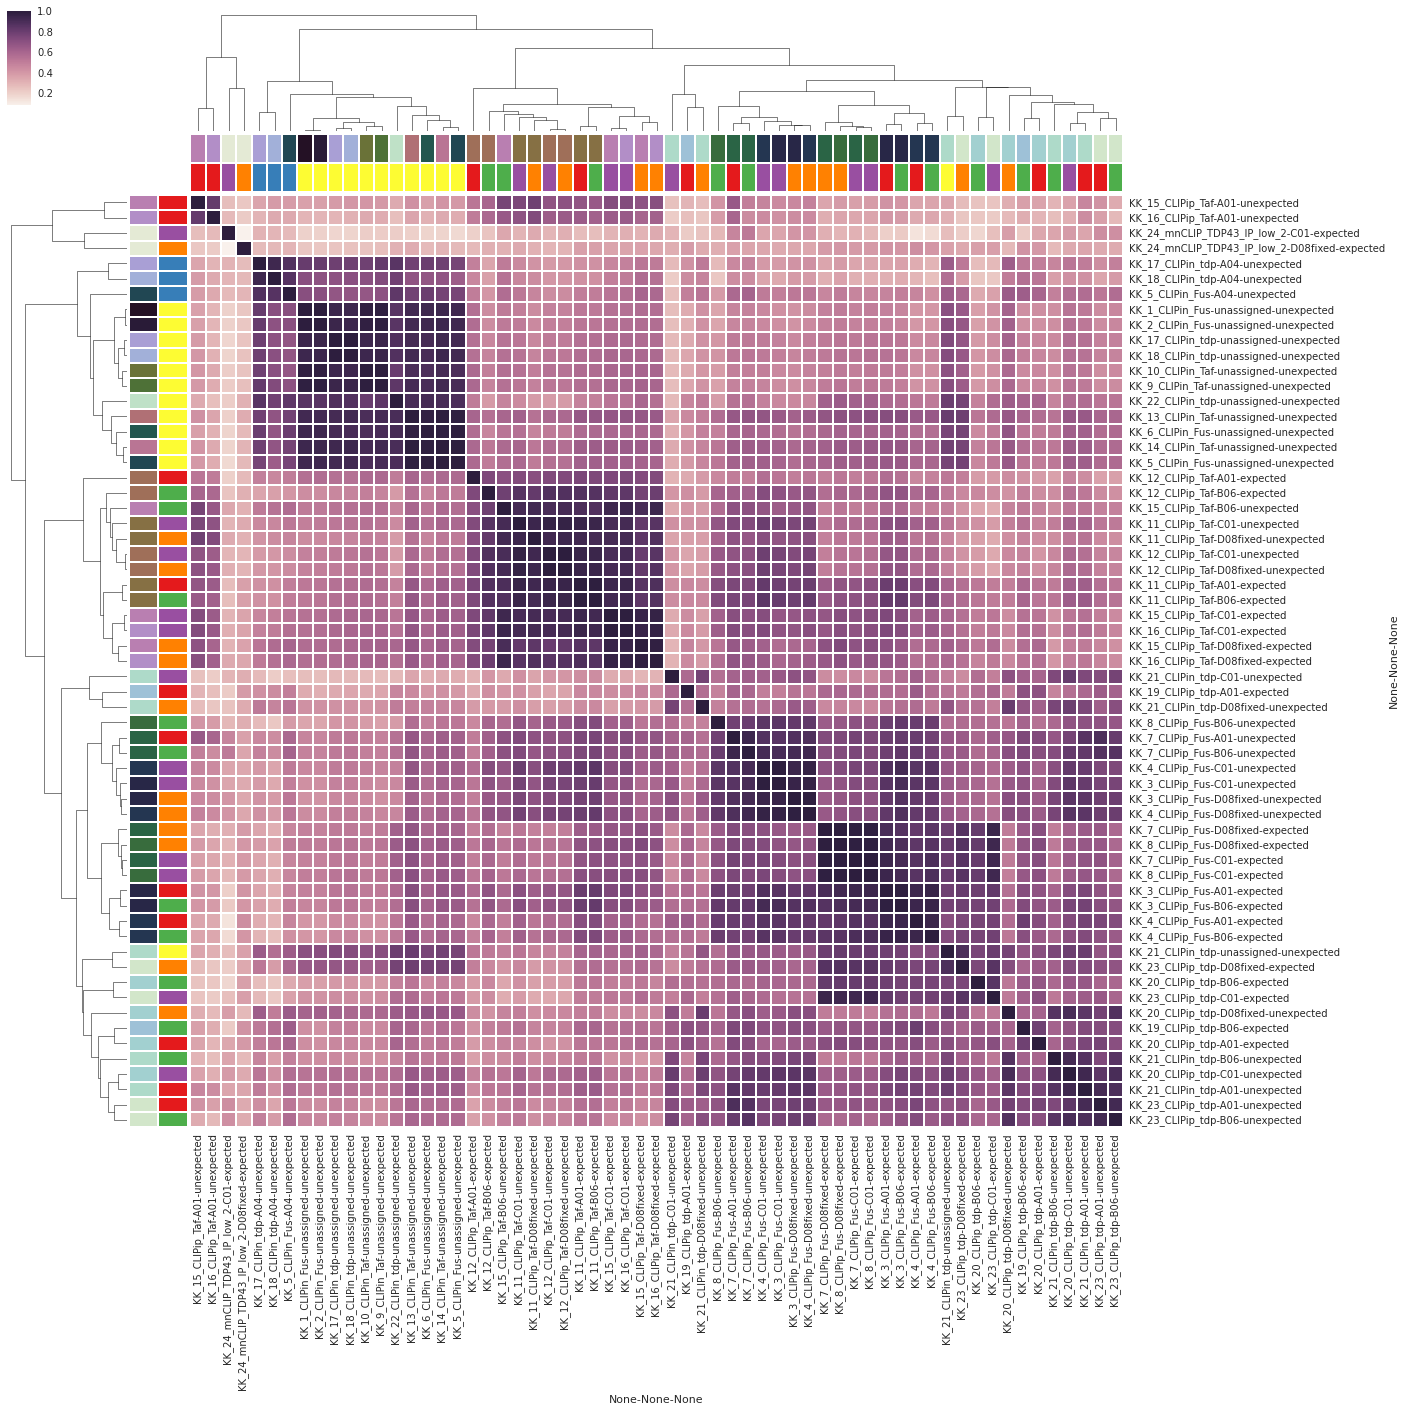

In [93]:
sns.clustermap(result, col_colors=[colors_1, colors_2], row_colors=[colors_1, colors_2], figsize=(20,20))

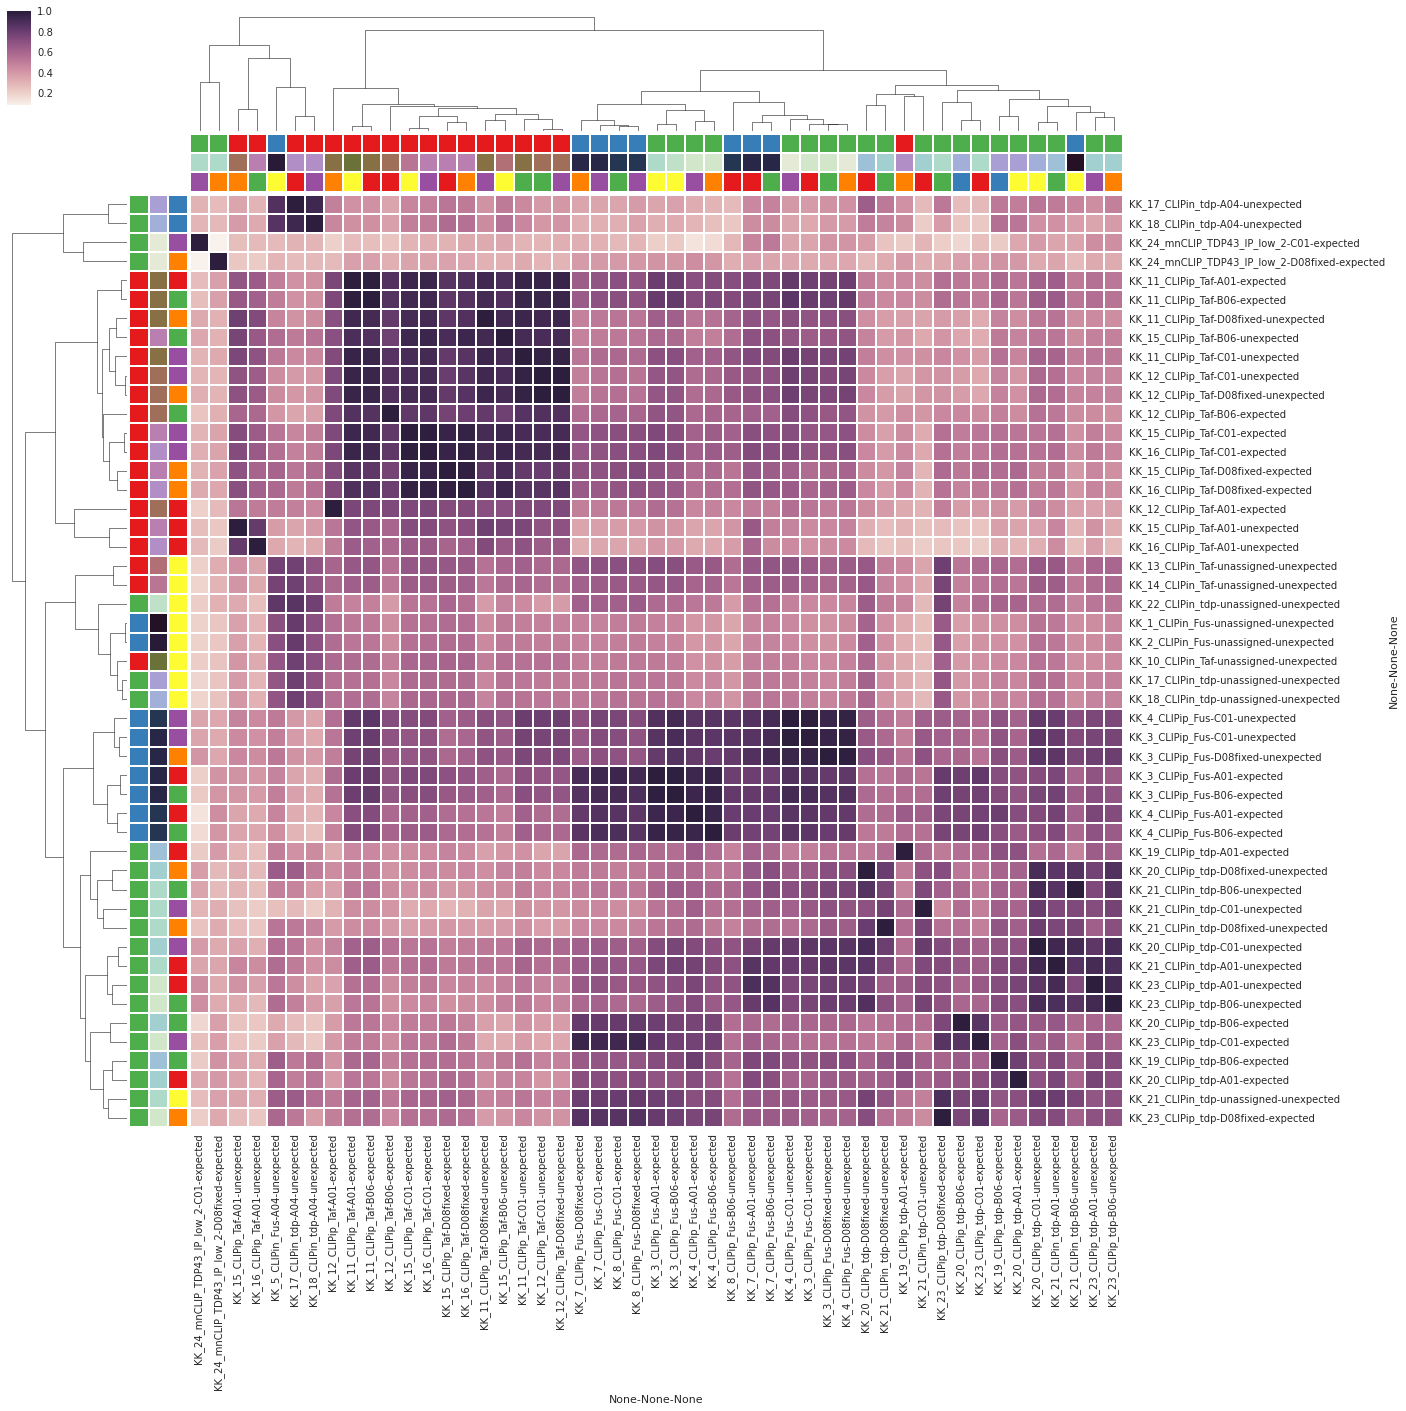

In [149]:
sns.clustermap(filtered_result, 
               col_colors=[rbp_color_results, illumina_color_results, inline_color_results], 
               row_colors=[rbp_color_results, illumina_color_results, inline_color_results], 
               figsize=(20,20))

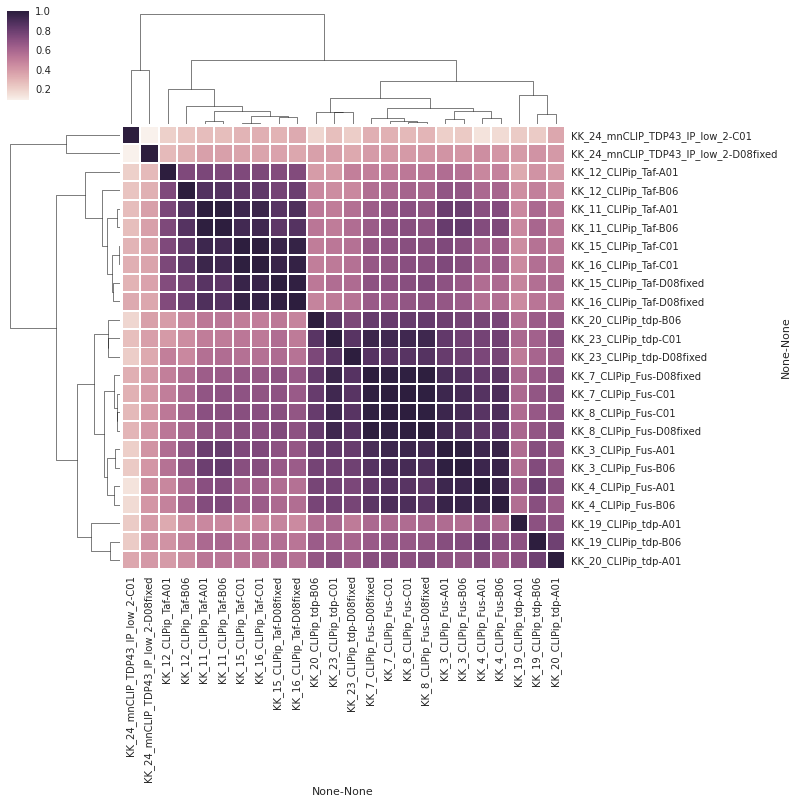

In [90]:
sns.clustermap(result.xs("expected", level=2).T.xs("expected", level=2))

Ok so for the most part the expected things cluster together, maybe don't worry about the strange barcodes, 